# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [125]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [170]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [141]:
df = pd.read_csv('/content/Traffic Data.csv')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [129]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [142]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [132]:
# df = df.drop(columns=['weather_main','weather_description'])

In [143]:
df = df.sort_values(by='date_time')

In [134]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00
...,...,...,...,...,...,...,...,...
6605,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00
14241,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00
9500,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00
15201,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [144]:
fig = px.bar(df, x='date_time', y="traffic_volume" , color='traffic_volume')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [145]:
fig = px.line(df, x='date_time', y="traffic_volume")
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<Axes: >

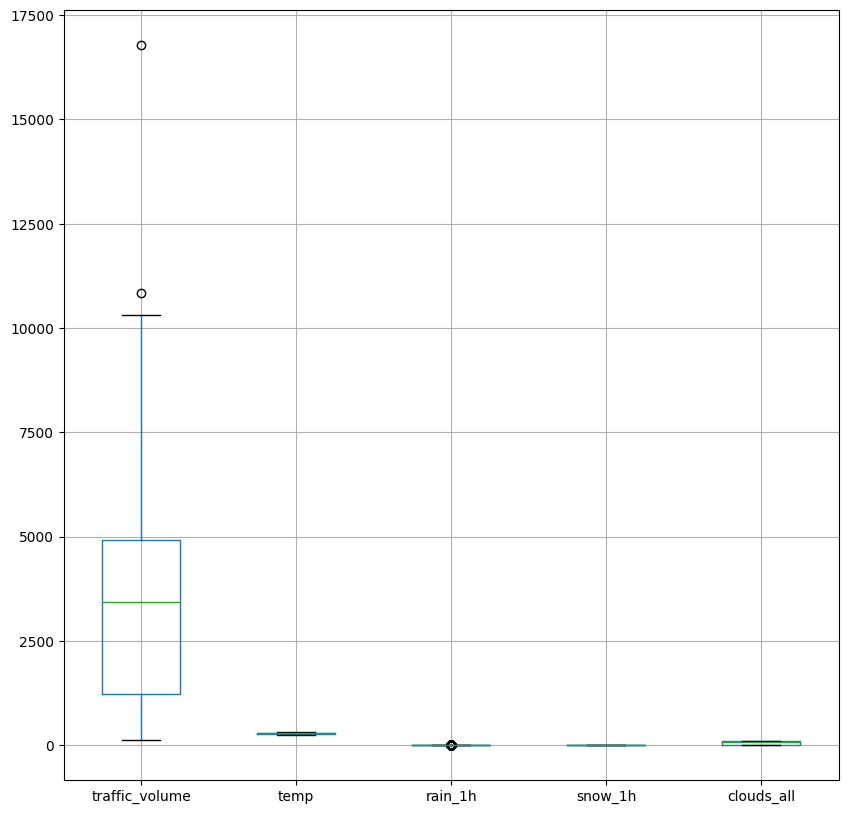

In [146]:
df.boxplot(figsize=(10,10))

In [138]:
fig = px.box(df, y="traffic_volume")
fig.show()

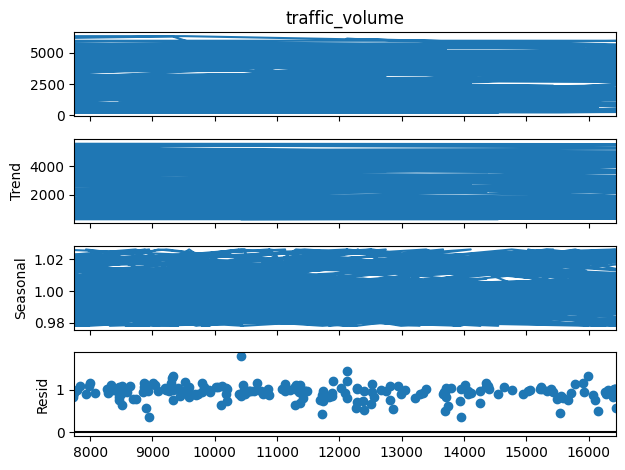

In [149]:
result = seasonal_decompose(df['traffic_volume'].head(500), period=7 , model='multiplicative')
result.plot()
plt.show()

In [103]:
df['traffic_volume'].dtype

dtype('float64')

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [44]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [150]:
df['traffic_volume'] = df['traffic_volume'].ffill()
df['traffic_volume'] = df['traffic_volume'].bfill()

In [81]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [151]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [152]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,NaN
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,4872.0
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,4872.0
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,4872.0
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,5074.0
...,...,...,...,...,...,...,...,...,...
6605,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3947.0
14241,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,3543.0
9500,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2781.0
15201,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,2159.0


In [153]:
df['day_of_week'] = df['date_time'].dt.day_of_week
df['month'] = df['date_time'].dt.days_in_month
df['Day of the year'] = df['date_time'].dt.day_of_year

In [115]:
# df = df.drop(columns='Day of the yea')

In [155]:
df.sample(10)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,day_of_week,month,Day of the year
19546,5656.0,261.03,0.0,0.0,1,Clear,sky is clear,2017-03-15 08:00:00,6628.0,2,31,74
4041,6262.0,301.55,0.0,0.0,90,Clouds,overcast clouds,2017-06-13 16:00:00,5559.0,1,30,164
7137,6032.0,270.81,0.0,0.0,75,Snow,light snow,2017-11-22 16:00:00,5793.0,2,30,326
617,1822.0,292.75,0.0,0.0,20,Clouds,few clouds,2017-07-23 08:00:00,1150.0,6,31,204
5183,6152.0,259.15,0.0,0.0,1,Clear,sky is clear,2016-12-14 07:00:00,5690.0,2,31,349
8589,4583.0,291.88,0.0,0.0,90,Rain,light rain,2018-05-08 13:00:00,4601.0,1,31,128
11654,4552.0,290.48,0.0,0.0,1,Clear,sky is clear,2017-04-08 12:00:00,4320.0,5,30,98
8159,5650.0,271.82,0.0,0.0,1,Clear,sky is clear,2017-12-01 06:00:00,2873.0,4,31,335
13527,596.0,262.95,0.0,0.0,40,Snow,light snow,2017-12-23 05:00:00,359.0,5,31,357
10685,4599.0,275.35,0.0,0.0,1,Clear,sky is clear,2017-01-18 18:00:00,6188.0,2,31,18


In [157]:
df_traffic = df['traffic_volume'].values

In [158]:
df_traffic

array([4872., 4872., 4872., ..., 2159., 1450.,  954.])

In [159]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler(feature_range=(0,1))
df_traffic = MMS.fit_transform(df_traffic.reshape(-1 , 1))

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [160]:
train_size = int(len(df_traffic) * 0.8)
test_size = len(df_traffic) - train_size
print(f"Train size: {(train_size)}")
print(f"Test size: {(test_size)}")

Train size: 16000
Test size: 4000


In [161]:
train, test = df_traffic[0: train_size, :], df_traffic[train_size : len(df_traffic), :]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [166]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [167]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [171]:
look_back = 1
train_X, train_Y = create_dataset(train, look_back)
test_X, test_Y = create_dataset(test, look_back)

In [172]:
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [173]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 4)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [174]:
# Train the model
model_fit = model.fit(train_X, train_Y, epochs=15, batch_size=42, validation_data=(test_X, test_Y))

Epoch 1/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0196 - val_loss: 0.0058
Epoch 2/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0048 - val_loss: 0.0021
Epoch 3/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 4/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 5/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 6/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 7/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 8/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 9/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 10/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 11/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 12/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [175]:
pred = model.predict(test_X)
pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.05434554],
       [0.04238524],
       [0.03437744],
       ...,
       [0.20417556],
       [0.16178976],
       [0.12704457]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [177]:
mse = mean_squared_error(test_Y, pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

Root Mean Squared Error (RMSE) on Test Set: 0.042461070719380996


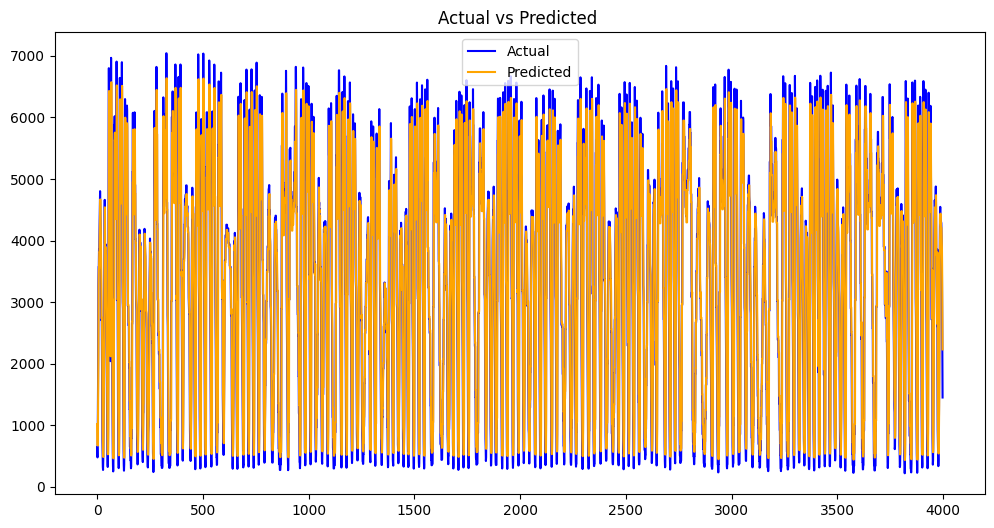

In [178]:
predictions = MMS.inverse_transform(np.concatenate((pred, np.zeros((pred.shape[0], 4))), axis=1))[:, 0]
Y_test_rescaled = MMS.inverse_transform(np.concatenate((test_Y.reshape(-1, 1), np.zeros((test_Y.shape[0], 4))), axis=1))[:, 0]

plt.figure(figsize=(12,6))
plt.plot(Y_test_rescaled, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('Actual vs Predicted ')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [179]:
model = Sequential()
model.add(GRU(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 4)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

In [180]:
# Train the model
model_fit_2 = model.fit(train_X, train_Y, epochs=15, batch_size=42, validation_data=(test_X, test_Y))

Epoch 1/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0218 - val_loss: 0.0057
Epoch 2/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 3/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 4/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 5/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 6/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 7/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 9/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 11/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 12/15
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [182]:
pred2 = model.predict(test_X)
pred2

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.06060827],
       [0.04828634],
       [0.04001433],
       ...,
       [0.21231121],
       [0.1698196 ],
       [0.13476138]], dtype=float32)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [183]:
mse = mean_squared_error(test_Y, pred2)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

Root Mean Squared Error (RMSE) on Test Set: 0.04275273221172656


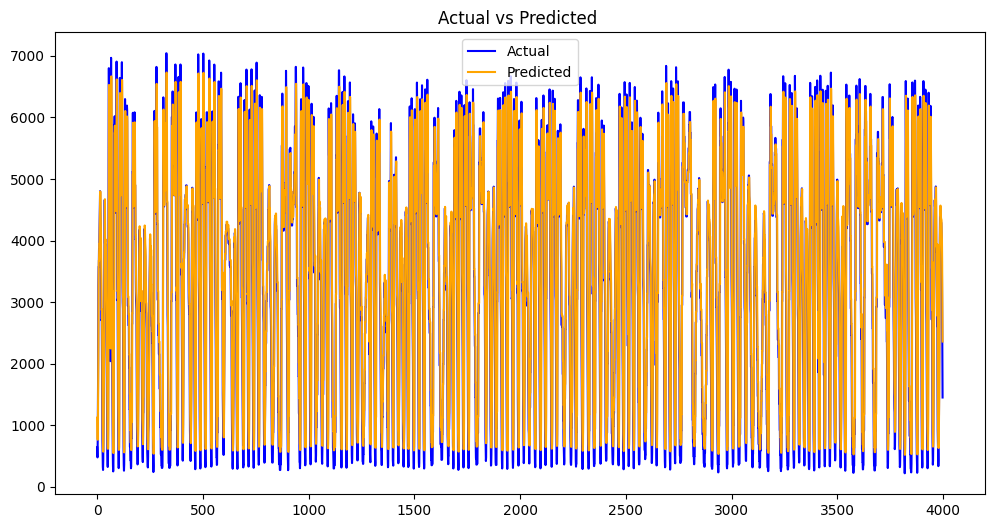

In [185]:
predictions2 = MMS.inverse_transform(np.concatenate((pred2, np.zeros((pred2.shape[0], 4))), axis=1))[:, 0]
Y_test_rescaled = MMS.inverse_transform(np.concatenate((test_Y.reshape(-1, 1), np.zeros((test_Y.shape[0], 4))), axis=1))[:, 0]

plt.figure(figsize=(12,6))
plt.plot(Y_test_rescaled, label='Actual', color='blue')
plt.plot(predictions2, label='Predicted', color='orange')
plt.title('Actual vs Predicted ')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

MinMaxSclaer = اخترتها عشان اعدل السكل حق الديتا بحيث يكون من (-1,1)
Handel (ffill , bfill) = عشان اعبي المسينق فاليو عن طريق الخانه اللي قبلها او بعدها
Feature Engineering = نعم اضفت ثلاث اعمده جديده وهي رقم لليوم في الاسبوع والشهر والسنه
model Architecure :    
LSTM = اخترت الديفولت وهي رقم 4 وتدل على عدد الاكفيشن فنكشن في الرسمه التابعه لها
GRU = نسخت كود LSTM وغيرت المودل
Train size = i split the data into train and test (train 80% , test 20$)
batch size = 42
فالحقيقة اردت كتابة 32 لكن خطأ في الكتابة وضعت 42
epochs = 15
ليس هنالك سبب قوي وضعتها لكي اسرع عملية الترين بقدر المستطاع
Loss Function and Metrics = MSE -> RMSE
اخترتها لاننا في الاسبوع الماضي نستخمد هذي الفنكشن
Overfitting and Underfitting
اعتقد ان المودل لدي يقترب من الاوفرفيتنق لتقارب البيانات الحقيقة مع البيانات المتوقعة
